Дисперсионный анализ используется для исследования  влияния одного или нескольких качественных показателей на количественный показатель.
В однофакторном дисперсионном анализе на одну количественную переменную Y влияет один фактор (один качественный показатель), наблюдаемый на k уровнях, т.е. имеет k выборок для переменной Y.
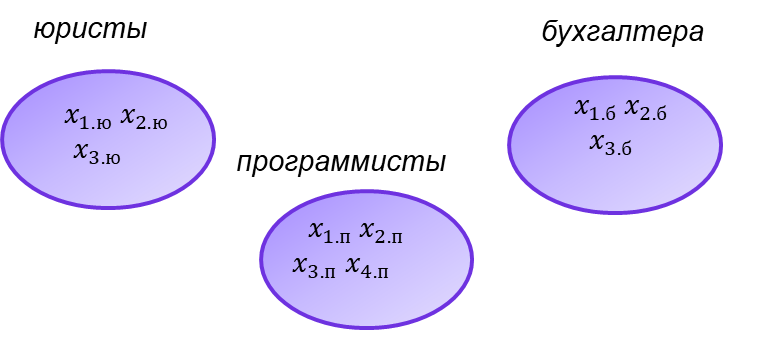

Идея дисперсионного анализа
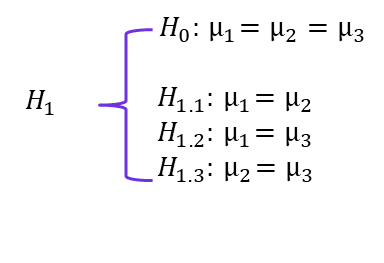
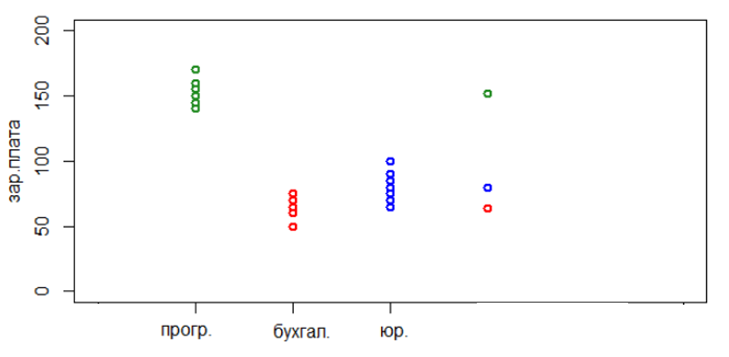
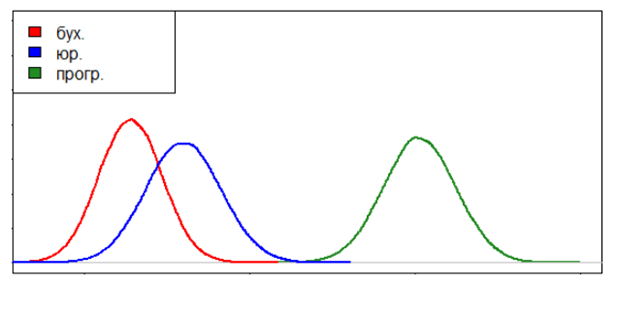

Более 2 групп – критерий Фишера F, 2 группы – критерий Стьюдента t

Распределение Фишера
𝐹_н = (𝜎_ф ^ 2) / (𝜎_ост ^ 2),
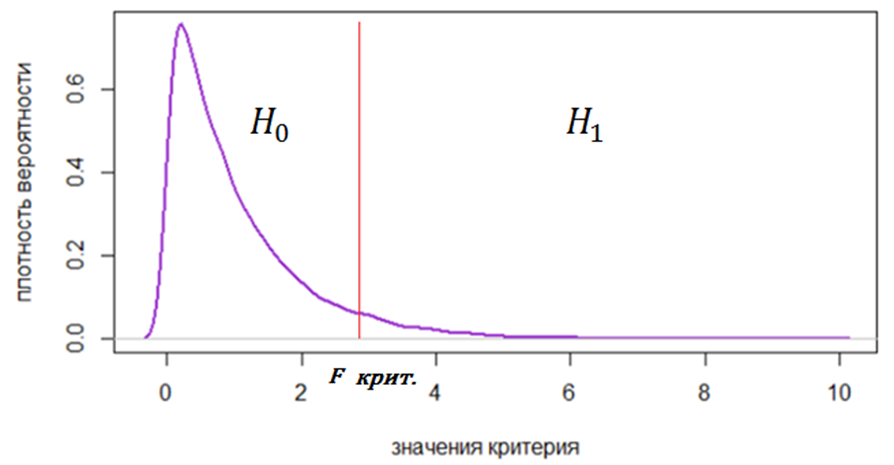

Дисперсионный анализ не отвечает на вопрос, между какими именно группами найдены статистически значимые различия. Если влияние фактора обнаружено и есть необходимость определить между какими группами есть статистически значимые различия, используют post hoc тесты для парных сравнений.

In [36]:
# Даны заработные платы юристов, программистов и бухгалтеров. Определить, влияет ли профессия на заработную плату. 
# 𝐹_н = (𝜎_ф^2) / (𝜎_ост^2)
# 𝜎_ф^2 = (𝑆_ф^2) / (𝑘−1),  где 𝑘 = 3 
# 𝜎_ост^2 = (𝑆_ост^2) / (𝑛−𝑘),  где 𝑛 = 21

# 𝑆_общ^2  = ∑(𝑦_𝑖𝑗  − 𝑌 ̅ )^2
# 𝑆_ф^2 = ∑_(𝑖=1)^𝑘 ((𝑦_𝑖 ) ̅  − 𝑌 ̅ )^2 ∗ 𝑛_𝑖 
# 𝑆_ост^2 = ∑_(𝑖=1)^𝑘 ∑_(𝑗=1)^(𝑛_𝑖) (𝑦_𝑖𝑗 − (𝑦_𝑖 ) ̅ )^2

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd

y1 = np.array([70, 50, 65, 60, 75, 67, 74])
y2 = np.array([80, 74, 90, 70, 75, 65, 85])
y3 = np.array([148, 142, 140, 150, 160, 170, 155])

k = 3
n = 21

y_mean_1 = np.mean(y1) #65.857
y_mean_2 = np.mean(y2) #77.0
y_mean_3 = np.mean(y3) #152.143
print(y_mean_1, y_mean_2, y_mean_3)

total = np.array([y1, y2, y3])
# print(total)

y_mean_total = np.mean(total) #98.333
print(y_mean_total)

# Сумма квадратов отклонений наблюдений от общего среднего
print(np.sum((total - 98.33)**2)) #32400.6669

# Сумма квадратов отклонений средних групповых значений от общего среднего
S_f = np.sum((y_mean_1 - 98.33)**2)*7 + np.sum((y_mean_2 - 98.33)**2)*7 + np.sum((y_mean_3 - 98.33)**2)*7
print(S_f) #30836.953

# Остаточная сумма квадратов отклонений
S_ost = np.sum((y1-y_mean_1)**2) + np.sum((y2-y_mean_2)**2) + np.sum((y3-y_mean_3)**2)
print(S_ost) #1563.714

D_f = S_f / (k-1) #15418.476
D_ost = S_ost / (n-k) #86.873
print(D_f, D_ost)

F_n = D_f / D_ost
print(F_n) #177.482

# Расчет с помощью функции
f = stats.f_oneway(y1, y2, y3)
print(f) #F_onewayResult(statistic=177.48291613374704, pvalue=1.4204669001071745e-12)

# Сравниваем F_n с табличным значением
# F_крит. = 3.55
# F_n=177.482 > F_крит.=3.55 => попадаем в область принятия альтернативной гипотезы
# pvalue=1.42e-12 < alpha = 0.05 => попадаем в область принятия альтернативной гипотезы

65.85714285714286 77.0 152.14285714285714
98.33333333333333
32400.6669
30836.952614285707
1563.7142857142858
15418.476307142853 86.87301587301587
177.48291747670376
F_onewayResult(statistic=177.48291613374704, pvalue=1.4204669001071745e-12)


In [14]:
# Post hoc test Tukey - между какими средними арифметическими есть статистически значимые различия

df = pd.DataFrame({'score': [70, 50, 65, 60, 75, 67, 74,
                   80, 74, 90, 70, 75, 65, 85,
                   148, 142, 140, 150, 160, 170, 155],
                   'group': np.repeat(['accountant', 'lawyer', 'programmer'], repeats=7)})
tukey = pairwise_tukeyhsd(endog = df['score'],
                         groups = df['group'],
                         alpha = 0.05)
print(tukey)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower   upper  reject
------------------------------------------------------------
accountant     lawyer  11.1429 0.0917 -1.5675 23.8532  False
accountant programmer  86.2857  0.001 73.5754  98.996   True
    lawyer programmer  75.1429  0.001 62.4325 87.8532   True
------------------------------------------------------------


Двухфакторный дисперсионный анализ

Взяли две детали кондиционеров: А и B (фактор А, фактор B). 
Исходные размеры деталей - уровень 1 для каждой детали.
Измерили прозводительность кондиционеров.
Поменяли размеры деталей - уровень 2 для каждой детали.

𝑦_𝑖𝑗𝑘   = 𝑀 + 𝐴_𝑖+𝐵_𝑗+𝐴𝐵+ 𝐸_𝑖𝑗𝑘 - производительность кондиционера для каждого сочетания размеров деталей
𝑀 - истинное значение
𝐴_𝑖 - влияние фактора А
𝐵_𝑗 - влияние фактора В
𝐴𝐵 - взаимодействие факторов
𝐸_𝑖𝑗𝑘 - случайная ошибка

𝑦_𝑖𝑗𝑘−𝑀= 𝐴_𝑖+𝐵_𝑗+𝐴𝐵+ 𝐸_𝑖𝑗𝑘

𝑆𝑆_𝑇= 𝑆𝑆_𝐴+ 𝑆𝑆_𝐵+ 𝑆𝑆_𝐴𝐵+ 𝑆𝑆_𝐸 - суммы квадратных отклонений

сравение наблюдаемых значений и табличных
𝐹_(н𝐴)__ 𝐹_(кр.𝐴)
𝐹_(н𝐵)__𝐹_(крВ)
𝐹_(н𝐴𝐵) __ 𝐹_(кр𝐴𝐵)

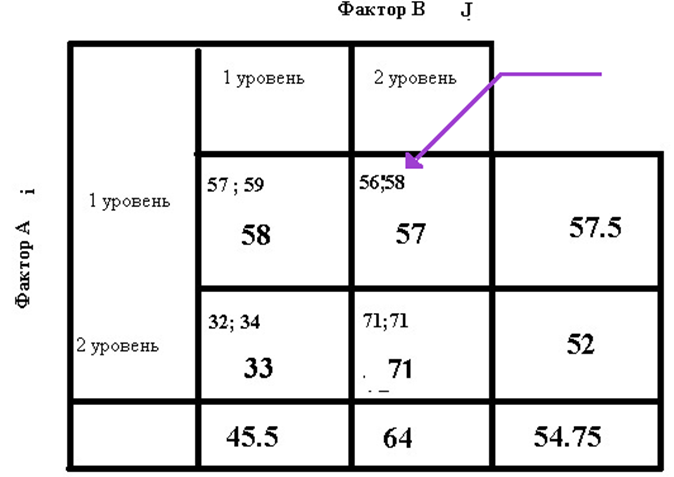

In [25]:
y111 = 57
y112 = 59
y11 = (y111 + y112) / 2
print(y11) #58

y121 = 56
y122 = 58
y12 = (y121 + y122) / 2
print(y12) #57

y211 = 32
y212 = 34
y21 = (y211 + y212) / 2
print(y21) #33

y221 = 71
y222 = 71
y22 = (y221 + y222) / 2
print(y22) #71

YcpA1 = (y11 + y12) / 2
print(YcpA1) #57.5

YcpA2 = (y21 + y22) / 2
print(YcpA2) #52

YcpB1 = (y11 + y21) / 2
print(YcpB1) #45.5

YcpB2 = (y12 + y22) / 2
print(YcpB2) #64

Ycp = np.mean(YcpA1 + YcpA2 + YcpB1 + YcpB2) / 4
print(Ycp) #54.75

58.0
57.0
33.0
71.0
57.5
52.0
45.5
64.0
54.75


In [28]:
# Теперь будем производить расчеты и заносить их в ANOVA (analysis of variance) таблицу

a = 2 #количество уровней фактора А
b = 2 #количество уровней фактора B
n = 2 #количество репликаций (измерений)

# SSt = sum((yijk)**2) - a*b*n*(Ycp**2) 
SSt = 1511.5

# SSA = a*n*sum((YcpA)**2) - a*b*n*(Ycp**2)
SSA = 60.5

# SSB = b*n*sum((YcpB)**2) - a*b*n*(Ycp**2)
SSB = 684.5

# SSAB = n*(sum((yijk_cp)**2)) - a*b*n*Ycp - SSA - SSB
SSAB = 760.5

SSE = SSt - SSA - SSB - SSAB
print(SSE) #6


6.0


In [29]:
# Расчет степеней свободы и сумм квадратных отклонений на одну степень свободы

dfA = a-1
dfB = b-1
dfAB = (a-1) * (b-1)
dfE = a*b*(n-1)

MSA = SSA / dfA
MSB = SSB / dfB
MSAB = SSAB / dfAB

MSE = SSE / dfE
print(MSE) #1.5

1.5


In [ ]:
# Рассчитаем критерий Фишера и построим ANOVA таблицу, где последний столбец  - это расчетный критерий Фишера.

FA = MSA / MSE
FB = MSB / MSE
FAB = MAB / MSE

F_t = 7.71